# 17L-5509 CS 5102 - Deep Learning Part A 
Convolutional Neural Network using Keras with Tensorflow backend

#### Import libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


#### Set parameters, learning rate is set while compiling the model below

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

#### Load mnist data

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Reshape and normalize data , also convert the classes to binary class vectors

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Build squential model with following architecture
Input layer
2D Convolutional layer with filter size of 3x3 and depth of = 32 (# of filters) and activation function 'relu'
2D Convolutional layer with filter size of 3x3 and depth = 64 and activation function 'relu'
MaxPooling layer with pool size 2x2
2D Convolutional layer with filter size of 3x3 and depth = 64 and activation function 'relu'
MaxPooling layer with pool size 2x2
Dropout 25%
Flatten
Fully connected layer with 128 neurons and activation function 'relu'
Dropout 25%
Output layer with sofmax activation function for class probabilities

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

#### Commpile and fit the model
Set Adadelta as optimizer. It is an adaptive learning method. Default value of learning rate is 1.0

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 357s 6ms/step - loss: 0.2681 - acc: 0.9150 - val_loss: 0.0465 - val_acc: 0.9848
Epoch 2/12
60000/60000 [==============================] - 348s 6ms/step - loss: 0.0768 - acc: 0.9770 - val_loss: 0.0339 - val_acc: 0.9884
Epoch 3/12
60000/60000 [==============================] - 348s 6ms/step - loss: 0.0596 - acc: 0.9820 - val_loss: 0.0262 - val_acc: 0.9912
Epoch 4/12
60000/60000 [==============================] - 787s 13ms/step - loss: 0.0506 - acc: 0.9849 - val_loss: 0.0241 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0428 - acc: 0.9871 - val_loss: 0.0250 - val_acc: 0.9927
Epoch 6/12
60000/60000 [==============================] - 362s 6ms/step - loss: 0.0401 - acc: 0.9880 - val_loss: 0.0233 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 347s 6ms/step - loss: 0.0352 - acc: 0.9893 - val_loss: 0.0253 -

#### The training accuracy is over 99%, now evaluate test score

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024054890837129733
Test accuracy: 0.9933


### The test accuraccy is also more than 99%

# 17L-5509 CS 5102 - Deep Learning Part B

#### Initial part is reused from Part A

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt


K.clear_session() 

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Define tensorboard callback for collecting loss, accuracy and weights data

In [2]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()),
                          histogram_freq = 1,
                          write_graph = True, 
                          write_images = True)

#### Save history from model.fit for later visualization of the accuracy and loss graphs

In [3]:
start_time = time()
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[tensorboard],
          validation_data=(x_test, y_test))
elapsed_time = time() - start_time
print(elapsed_time)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.2361 - acc: 0.9253 - val_loss: 0.0509 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0658 - acc: 0.9798 - val_loss: 0.0385 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0493 - acc: 0.9847 - val_loss: 0.0270 - val_acc: 0.9918
Epoch 4/12
60000/60000 [==============================] - 259s 4ms/step - loss: 0.0400 - acc: 0.9878 - val_loss: 0.0228 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 259s 4ms/step - loss: 0.0317 - acc: 0.9903 - val_loss: 0.0210 - val_acc: 0.9932
Epoch 6/12
60000/60000 [==============================] - 254s 4ms/step - loss: 0.0292 - acc: 0.9906 - val_loss: 0.0221 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 258s 4ms/step - loss: 0.0269 - acc: 0.9918 - val_loss: 0.0235 - 

#### Plot loss and accuracy for training and validation vs epochs

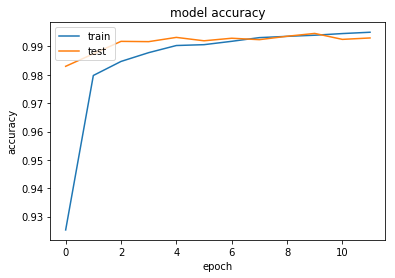

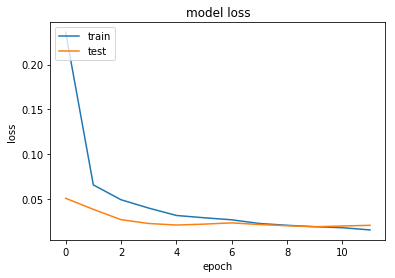

In [4]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Tensorboard accuracy and loss graphs

<img src="logs\accuracy_loss_tensorboard.PNG">

#### Tensorboard network graph - complete

<img src="logs\graph_tensorboard.PNG">

#### Tensorboard network graph - simple

<img src="logs\graph_simple_tensorboard.PNG">

#### Tensorboard weights visualization of convolational and fully connected layers

<img src="logs\weights_conv_dense_tensorboard.PNG">